In [3]:
# Required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

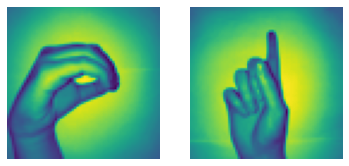

In [4]:
# Load dataset
x_l = np.load("Sign-language-digits-dataset/X.npy") # İmage dataset
y_l = np.load("Sign-language-digits-dataset/Y.npy") # Class information

# small visualization to dataset
img_size = 64 # All images have 64x64 size
plt.subplot(1,2,1)
plt.imshow(x_l[255].reshape(img_size,img_size)) # 0 sign
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_l[866].reshape(img_size,img_size)) # 1 sign
plt.axis('off')
plt.show()

In [5]:
x = np.concatenate((x_l[204:409], x_l[822:1027]),axis=0)
#from 0 to 204 is zero sign
#from 205 to 410 is one sign
z = np.zeros(205)
o = np.ones(205)
y = np.concatenate((z,o),axis=0).reshape(x.shape[0],1)

In [6]:
print("X Shape: ", x.shape)
print("Y Shape: ", y.shape)

X Shape:  (410, 64, 64)
Y Shape:  (410, 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.15,random_state=16)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print("Number of train: " , number_of_train)
print("Number of test: " , number_of_test)
print("X_train shape: " , X_train.shape)
print("X_test shape: " , X_test.shape)

Number of train:  348
Number of test:  62
X_train shape:  (348, 64, 64)
X_test shape:  (62, 64, 64)


In [8]:
# We make 2D images one-dimensional.
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test,X_test.shape[1] * X_test.shape[2])
print("X_train_flatten shape -> " , X_train_flatten.shape)
print("X_test_flatter shape -> " , X_test_flatten.shape)
print("Y_train shape -> " , Y_train.shape)
print("Y_test shape -> " , Y_test.shape)

X_train_flatten shape ->  (348, 4096)
X_test_flatter shape ->  (62, 4096)
Y_train shape ->  (348, 1)
Y_test shape ->  (62, 1)


In [9]:
# We apply transpose to do matrix multiplication.
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x_train: " , x_train.shape)
print("x_test: " , x_test.shape)
print("y_train: " , y_train.shape)
print("y_test: " , y_test.shape)

x_train:  (4096, 348)
x_test:  (4096, 62)
y_train:  (1, 348)
y_test:  (1, 62)


In [10]:
# İnitialize parameters
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

In [11]:
w,b = initialize_weights_and_bias(x_train.shape[0])
print(f"weights -> {w.shape}\nbias -> {b}")

weights -> (4096, 1)
bias -> 0.0


In [12]:
# z = np.dot(w.T,x_train) + b
def sigmoid(z):
    y_head = 1 / (1+np.exp(-z))
    return y_head
# y_head = sigmoid(z)

In [16]:
# Example
y_head = sigmoid(10)
y_head

0.9999546021312976

In [19]:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic (0-1)
    loss = -y_train * np.log(y_head) - (1-y_train) * np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    return cost